In [45]:
import keras
import numpy as np
from tensorflow.keras.layers import LSTM
import tensorflow.compat.v2 as tf
import BinaryLSTM
import importlib
importlib.reload(BinaryLSTM)
import larq
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation

In [2]:
seq_length=5
X =[[i+j for j in range(seq_length)] for i in range(100)]
X =np.array(X)

y =[[ i+(i-1)*.5+(i-2)*.2+(i-3)*.1 for i in range(4,104)]]
y =np.array(y)
X=X.reshape((100,5,1))
y=y.reshape((100,1))


In [3]:
model = Sequential()
model.add(LSTM(8,input_shape=(5,1), return_sequences=False))#, recurrent_constraint='weight_clip', kernel_constraint='weight_clip'))#sequence=True = many to many
model.add(Dense(2,kernel_initializer='normal',activation='linear'))
model.add(Dense(1,kernel_initializer='normal',activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mse',optimizer = opt, metrics=['MSE'])
model.fit(X,y,epochs=2000,batch_size=5,validation_split=0.05,verbose=0)
scores = model.evaluate(X,y,verbose=1,batch_size=5)
print('MSE: {}'.format(scores[1])) 

20/20 [==============================] - 0s 2ms/step - loss: 2549.0913 - MSE: 2549.0913
MSE: 2549.09130859375


4/4 [==============================] - 0s 2ms/step


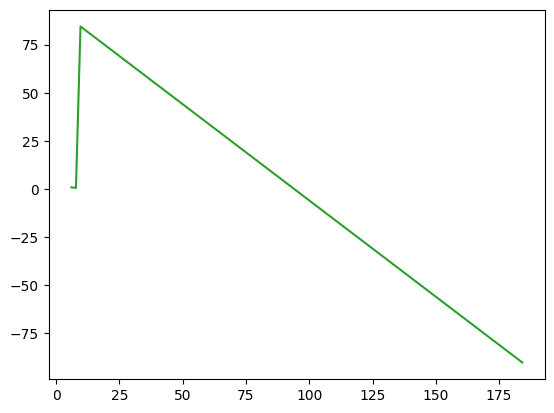

In [4]:
predict=model.predict(X)
plt.plot(y, predict-y, 'C2')
#plt.ylim(ymax = 3, ymin = -3)
plt.show()

In [46]:
model2 = Sequential()
model2.add(BinaryLSTM.BinaryLSTM(8,input_shape=(5,1), return_sequences=False, 
                                 recurrent_constraint=larq.constraints.weight_clip(clip_value=1), 
                                 kernel_constraint=larq.constraints.weight_clip(clip_value=1)))
model2.add(Dense(2,kernel_initializer='normal', activation='linear'))
model2.add(Dense(1,kernel_initializer='normal', activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model2.compile(loss='mse',optimizer = opt, metrics=['MSE'])
model2.fit(X, y, epochs=2000, batch_size=5, validation_split=0.05, verbose=0)
scores = model2.evaluate(X,y,verbose=1,batch_size=5)
print('MSE: {}'.format(scores[1])) 

20/20 [==============================] - 0s 1ms/step - loss: 5.1277 - MSE: 5.1277
MSE: 5.127685546875


4/4 [==============================] - 0s 2ms/step


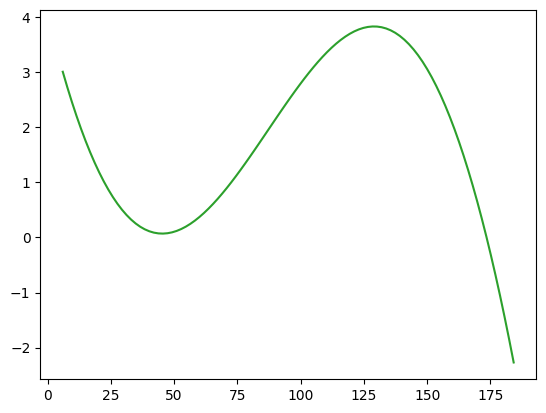

In [47]:
predict=model2.predict(X)
plt.plot(y, predict-y, 'C2')
#plt.ylim(ymax = 3, ymin = -3)
plt.show()